In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def modelo_seirhd(val_inic, param, t):
    N_0, S_0, E_0, I_0, R_0, H_0, D_0 = val_inic
    N, S, E, I, R, H, D = [N_0], [S_0], [E_0], [I_0], [R_0], [H_0], [D_0]
    mu_b, mu_m, u_e , u_i, u_h, gamma_e, gamma_i, gamma_h, phi_d, phi_h = param
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_N = N[-1] + ((mu_b-mu_m)*N[-1]-phi_d*gamma_h*H[-1])*dt
        next_S = S[-1] + (mu_b-S[-1]*((u_e*E[-1]+u_i*I[-1]+u_h*H[-1]))/N[-1])*dt
        next_E = E[-1] + (S[-1]*((u_e*E[-1]+u_i*I[-1]+u_h*H[-1]))/N[-1])*dt - (gamma_e+ mu_m)*E[-1]*dt
        next_I = I[-1] + gamma_e*E[-1]*dt - (gamma_i+mu_m)*I[-1]*dt
        next_R = R[-1] + (phi_r*gamma_i*I[-1]+(1-phi_d)*gamma_h*H[-1])*dt - mu_m*R[-1]*dt
        next_H = H[-1] + (1-phi_r)*gamma_i*I[-1]*dt - (gamma_h + mu_m)*H[-1]*dt 
        next_D = D[-1] + phi_d*gamma_h*H[-1]*dt
        N.append(next_N)
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        H.append(next_H)
        D.append(next_D)
    return np.stack([N, S, E, I, R, H, D]).T

In [3]:
# Definir Parámetros temporales

t_final = 100
dt = .1
t = np.linspace(0, t_final, int(t_final/dt) + 1)


In [12]:
# Condiciones Iniciales del modelo
N=10
val_inic = N, N - 5/N, 5/N, 0, 0, 0, 0

In [13]:

#Tasa de nacimiento natural
mu_b=0.01
#Tasa de mortalidad natural
mu_m=0.01

#Tasa de contagio enfermos asintomáticos
u_e=0.6
#Tasa de contagio enfermos sintomáticos
u_i=0.7
#Tasa de contagio hospitalizados
u_h=0.1

#Tasa de transición al desarrollo de síntomas
gamma_e=(1/4)
#Tasa de transición a hospitalización
gamma_i=(1/5)
#Tasa de transición a muerte.
gamma_h=(1/5)

#Razón de infectados que muere
phi_d=(5/20)
#Razón de infectados que se recupera
phi_r=(15/20)

param = mu_b, mu_m, u_e , u_i, u_h, gamma_e, gamma_i, gamma_h, phi_d, phi_r


In [14]:

# Correr simulación
resultados = modelo_seirhd(val_inic, param, t)

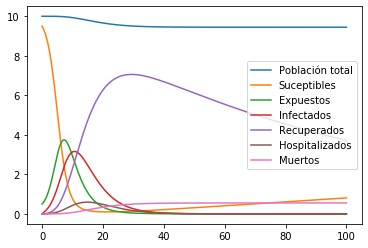

In [15]:
plt.plot(t,resultados)
plt.legend(["Población total","Suceptibles","Expuestos","Infectados","Recuperados","Hospitalizados","Muertos"])